In [1]:
#Read the json file from data folder
import json
import pandas as pd




In [29]:
with open('data\yelp_dataset\yelp_academic_dataset_business.json') as f:
    data = [json.loads(line) for line in f]

In [30]:
business_df = pd.read_json('data\yelp_dataset\yelp_academic_dataset_business.json',
                            orient='records', lines=True)[["business_id",
                                                            "address",
                                                            "city","stars",
                                                            "review_count","attributes",
                                                            "categories"]]


In [31]:
business_df.head()

,business_id,address,city,stars,review_count,attributes,categories
0,Pns2l4eNsfO8kk83dixA6A,"1616 Chapala St, Ste 2",Santa Barbara,5.0,7,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop..."
1,mpf3x-BjTdTEA3yCZrAYPw,87 Grasso Plaza Shopping Center,Affton,3.0,15,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma..."
2,tUFrWirKiKi_TAnsVWINQQ,5255 E Broadway Blvd,Tucson,3.5,22,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G..."
3,MTSW4McQd7CbVtyjqoe9mw,935 Race St,Philadelphia,4.0,80,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,mWMc6_wTdE0EUBKIGXDVfA,101 Walnut St,Green Lane,4.5,13,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food"


Lets perform some analysis on Categories column

In [32]:
business_df['categories'] = business_df['categories'].str.split(',')

Check for null or None values

In [33]:
#check for null values in the dataset
business_df.isnull().sum()

business_id         0
address             0
city                0
stars               0
review_count        0
attributes      13744
categories        103
dtype: int64

In [34]:
#Since it is not possible to identify the cusine without the category, we will drop the rows with null values
business_df.dropna(inplace=True)

Let's extract cusines of restaurant. Probably the easy way to do this is using an exhaustive list from wikipedia or other sources.

To undesrtand better the attributes column, lets analyse the unique attributes.

In [35]:
#Store the number of unique category elements in the categories column
unique_categories = set()
for categories in business_df['categories']:
    for category in categories:
        unique_categories.add(category)
 

In [37]:
#Go through each row in business_df['categories] and check if the category is present in the unique_categories set and store the count for each category
category_count = {}
for categories in business_df['categories']:
    for category in categories:
        if category in unique_categories:
            if category in category_count:
                category_count[category] += 1
            else:
                category_count[category] = 1

In [38]:
#Sort the category_count dictionary in descending order
sorted_category_count = sorted(category_count.items(), key=lambda x: x[1], reverse=True)

#display the top 10 categories
sorted_category_count[:10]

[(' Restaurants', 36588),
 (' Food', 20669),
 (' Shopping', 18171),
 ('Restaurants', 15115),
 (' Nightlife', 9926),
 (' Beauty & Spas', 9591),
 (' Home Services', 9363),
 (' Bars', 9084),
 (' Health & Medical', 8197),
 (' Local Services', 7844)]

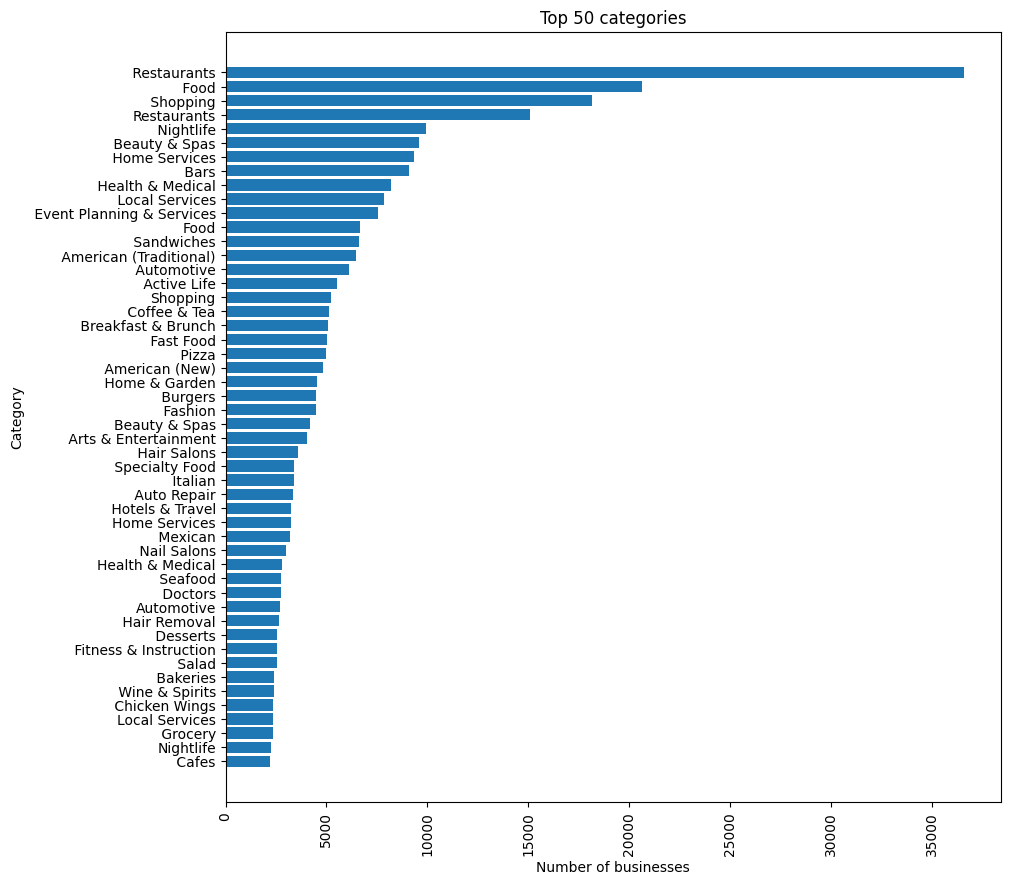

In [59]:
#plot the top 20 categories
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
plt.barh([x[0] for x in sorted_category_count[:50]][::-1], [x[1] for x in sorted_category_count[:50]][::-1])
plt.ylabel('Category')
plt.xlabel('Number of businesses')
plt.title('Top 50 categories')
plt.xticks(rotation=90)
plt.show()

In [36]:
#save categories in a excel file
import openpyxl
unique_categories_df = pd.DataFrame(unique_categories, columns=['categories'])
unique_categories_df.to_excel('categories.xlsx', index=False)


In [21]:
cusine_list = ["African",
               "French",
               "American",
               "Asian",
               "Chinese",
               "Indian",
               "Italian",
               "Japanese",
               "Korean",
               "Mexican",
               "Middle Eastern",
               "Thai",
               "Vietnamese",
               "Greek",
               "Mediterranean",
               "Spanish",
               "Turkish",
               "British",
               "German",
               "European",
               "Arabic",
               "Sri Lankan",
               "Sount American",
               "Pakistani",
                "Portuguese",
                "Nordic",
               ]

In [22]:
business_df['categories'] = business_df['categories'].apply(lambda x: [item for item in x if item in cusine_list])

In [23]:
business_df.head()

,business_id,address,city,stars,review_count,attributes,categories
0,Pns2l4eNsfO8kk83dixA6A,"1616 Chapala St, Ste 2",Santa Barbara,5.0,7,{'ByAppointmentOnly': 'True'},[]
1,mpf3x-BjTdTEA3yCZrAYPw,87 Grasso Plaza Shopping Center,Affton,3.0,15,{'BusinessAcceptsCreditCards': 'True'},[]
2,tUFrWirKiKi_TAnsVWINQQ,5255 E Broadway Blvd,Tucson,3.5,22,"{'BikeParking': 'True', 'BusinessAcceptsCredit...",[]
3,MTSW4McQd7CbVtyjqoe9mw,935 Race St,Philadelphia,4.0,80,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...",[]
4,mWMc6_wTdE0EUBKIGXDVfA,101 Walnut St,Green Lane,4.5,13,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...",[]


In [11]:
#print rows where categories is not empty
business_df = business_df[business_df.astype(str)['categories'] != '[]']

In [13]:
business_df.shape

(5938, 7)

In [54]:
len(unique_categories)
#check if "indian" is present in the unique categories
" " in unique_categories

False

## Filtering and loading business dataset

In [2]:
def fiter_load_business(file : str, category :str) -> pd.DataFrame:
    """
    This function takes in the file name and the category and returns a dataframe with the filtered data
    """
    business_df = pd.read_json(file, orient='records', lines=True)[["business_id",
                                                                    "name",
                                                                    "address",
                                                                    "city","stars",
                                                                    "review_count","attributes",
                                                                    "categories"]]
    business_df['categories'] = business_df['categories'].str.split(',')
    business_df.dropna(inplace=True)
    
    # filter the dataframe based on the category variable passed
    business_df = business_df[business_df['categories'].apply(lambda x: category in x)]
    business_df.reset_index(inplace=True, drop=True)
    
    return business_df
    

In [3]:
business_df = fiter_load_business('data\yelp_dataset\yelp_academic_dataset_business.json', 'Restaurants')

In [10]:
business_df.head()

,business_id,name,address,city,stars,review_count,attributes,categories
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,4.0,80,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","[Restaurants, Food, Bubble Tea, Coffee & Te..."
1,9OG5YkX1g2GReZM0AskizA,Romano's Macaroni Grill,5505 S Virginia St,Reno,2.5,339,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","[Restaurants, Italian]"
2,tMkwHmWFUEXrC9ZduonpTg,The Green Pheasant,215 1st Ave S,Nashville,4.0,161,"{'RestaurantsGoodForGroups': 'True', 'HappyHou...","[Restaurants, Japanese, Seafood]"
3,2xVsWBNFwZOxIOdd9Mwnww,Cheeseburger In Paradise,116 N Pottstown Pike,Exton,2.5,20,"{'NoiseLevel': 'u'average'', 'HasTV': 'True', ...","[Restaurants, Burgers]"
4,ljxNT9p0y7YMPx0fcNBGig,Tony's Restaurant & 3rd Street Cafe,312 Piasa St,Alton,3.0,94,"{'RestaurantsReservations': 'True', 'Restauran...","[Restaurants, Specialty Food, Steakhouses, ..."


In [15]:
type(business_df)

pandas.core.frame.DataFrame

After filtering we save them as pickle files for quicker and efficient reading

Due to the large size of users, we read them user data as chunks

In [19]:
#read user data in chunks
for chunk in pd.read_json('data\yelp_dataset\yelp_academic_dataset_review.json',
                        orient='records', lines=True, chunksize=10000):
    chunk_df = pd.DataFrame(chunk)
    print(chunk_df.shape)
    print(chunk_df.head())
    break
                        

(10000, 9)


KeyboardInterrupt: 

In [2]:
#read the 1000 rows of user data
user_df = pd.read_json('data\yelp_dataset\yelp_academic_dataset_user.json',
                        orient='records', lines=True, nrows=1000)[["user_id"]]

Also read reviews as chunks

In [3]:
review_df = pd.read_json('data\yelp_dataset\yelp_academic_dataset_review.json',
                        orient='records', lines=True, nrows=1000)[["review_id","business_id","user_id","stars","text"]]

Iterate through each user_id, and find review_ids

In [ ]:
def group_by_user(user_id : str, review_df : pd.DataFrame) -> list:
    review_ids = review_df[review_df['user_id'] == user_id].review_id.tolist()
    return review_ids
    

In [5]:
import concurrent.futures

#empty dictionary to store the user_id and the review_ids
user_review_dict = {}
business_ids = business_df.business_id.unique().tolist()
def process_review_chunk(review_chunk):
    review_chunk = review_chunk[['user_id', 'review_id', 'business_id', 'stars', 'text']]
    review_chunk_df = pd.DataFrame(review_chunk)
    for index, row in review_chunk_df.iterrows():
        if row['business_id'] in business_ids:
            if row['user_id'] in user_review_dict:
                user_review_dict[row['user_id']].append(row['review_id'])
            else:
                user_review_dict[row['user_id']] = [row['review_id']]

with concurrent.futures.ProcessPoolExecutor() as executor:
    for review_chunk in pd.read_json('data\yelp_dataset\yelp_academic_dataset_review.json',
                                     orient='records', lines=True, chunksize=10000):
        executor.submit(process_review_chunk, review_chunk)
    
    

In [ ]:
#dump the user_review_dict to a pickle file
import pickle
with open('user_review_dict.pickle', 'wb') as handle:
    pickle.dump(user_review_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
for user_chunk in pd.read_json('data\yelp_dataset\yelp_academic_dataset_user.json',
                        orient='records', lines=True, chunksize=10000)[["user_id"]]:
    """ This loop iterates through each chunk of users, and checks if the user has written a review. """

    user_chunk_df = pd.DataFrame(user_chunk)
    list_of_reviews = []
    user_chunk_df["Review_ids"]=""
    for review_chunk in pd.read_json('data\yelp_dataset\yelp_academic_dataset_review.json',
                        orient='records', lines=True, chunksize=10000)[["review_id","business_id","user_id","stars","text"]]:
        #iterate through user_id
        for user in user_chunk_df.user_id:
            review = group_by_user(user, review_chunk)
            if review is not None:
                list_of_reviews.append(review)
            
    #create 1 big list of reviews
    total_reviews = [item for sublist in list_of_reviews for item in sublist]
    user_chunk_df
    


In [5]:
user_id_1= user_df.iloc[]['user_id']
#filter the review_df for the user_id_1
user_1_reviews = review_df[review_df['user_id'] == user_id_1]

In [7]:
review_df.head()

,review_id,business_id,user_id,stars,text
0,KU_O5udG6zpxOg-VcAEodg,XQfwVwDr-v0ZS3_CbbE5Xw,mh_-eMZ6K5RLWhZyISBhwA,3,"If you decide to eat here, just be aware it is..."
1,BiTunyQ73aT9WBnpR9DZGw,7ATYjTIgM3jUlt4UM3IypQ,OyoGAe7OKpv6SyGZT5g77Q,5,I've taken a lot of spin classes over the year...
2,saUsX_uimxRlCVr67Z4Jig,YjUWPpI6HXG530lwP-fb2A,8g_iMtfSiwikVnbP2etR0A,3,Family diner. Had the buffet. Eclectic assortm...
3,AqPFMleE6RsU23_auESxiA,kxX2SOes4o-D3ZQBkiMRfA,_7bHUi9Uuf5__HHc_Q8guQ,5,"Wow! Yummy, different, delicious. Our favo..."
4,Sx8TMOWLNuJBWer-0pcmoA,e4Vwtrqf-wpJfwesgvdgxQ,bcjbaE6dDog4jkNY91ncLQ,4,Cute interior and owner (?) gave us tour of up...


In [12]:
review_df[review_df['user_id'] == "mh_-eMZ6K5RLWhZyISBhwA"].review_id

0    KU_O5udG6zpxOg-VcAEodg
Name: review_id, dtype: object